**Preet Jain**

#                            Heart Disease Diagnostic Analysis

# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Extracting CSV Dataset From System using Pandas Library

In [ ]:
df=pd.read_csv('/content/Heart_Disease_data.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [ ]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [ ]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [ ]:
#Checking Not null values
df.info()

# We can see that majority of the variables are of int64 type and are non-null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


##### There are 14 features in Dataset

1) age: The person's age in years

2) sex: The person's sex (1 = male, 0 = female)

3) cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4:          asymptomatic)

4) trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5) chol: The person's cholesterol measurement in mg/dl

6) fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7) restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or        definite left ventricular hypertrophy by Estes' criteria)

8) thalach: The person's maximum heart rate achieved

9) exang: Exercise induced angina (1 = yes; 0 = no)

10) oldpeak: ST depression induced by exercise relative to rest

11)slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12)ca: The number of major vessels (0-3)

13)thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14)num: Heart disease (0 = no, 1 = yes)

In [ ]:
# On closer analysis of the dataset it is visible that there are some attributes which are classified as int64
# but they are categorical variables having a specific number of classes. Eg. sex, cp, slope etc.

In [ ]:
df.shape

# The dataset contains 303 records and 14 different attributes / variables

(1025, 14)

In [ ]:
df.describe()

# The describe() function gives the statistical summary of the numberical columns of the dataset.

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

# Percentage of people having Heart Disease


In [ ]:
target=df.groupby('target').size()
target

target
0    499
1    526
dtype: int64

In [ ]:
def heart_d(r):
    if r==0:
        return 'Absence'
    elif r==1:
        return 'Presence'

In [ ]:
#Applying converted data into our dataset with new column - Heart_Disease

df['Heart_Disease']=df['target'].apply(heart_d)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target Heart_Disease  
0   2     3       0       Absence  
1   0     3       0       Absence  
2   0     3       0       Absence  
3   1     3       0       Absence  
4   3     2       0       Absence

In [ ]:
hd=df.groupby('Heart_Disease')['target'].count()
hd

Heart_Disease
Absence     499
Presence    526
Name: target, dtype: int64

In [ ]:
#Converting Numerical Data into Categorical Data

def gen(r):
    if r==1:
        return 'Male'
    elif r==0:
        return 'Female'

In [ ]:
#Applying converted data into our dataset with new column - sex1

df['sex1']=df['sex'].apply(gen)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target Heart_Disease    sex1  
0   2     3       0       Absence    Male  
1   0     3       0       Absence    Male  
2   0     3       0       Absence    Male  
3   1     3       0       Absence    Male  
4   3     2       0       Absence  Female

In [ ]:
#Converting Numerical Data into Categorical Data

def age_rng(r):
    if r>=29 and r<40:
        return 'Young Age'
    elif r>=40 and r<55:
        return 'Middle Age'
    elif r>55:
        return 'Elder Age'

In [ ]:
max(df['age'])

77

In [ ]:
#Applying converted data into our dataset with new column - Age_Range

df['Age_Range']=df['age'].apply(age_rng)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target Heart_Disease    sex1   Age_Range  
0   2     3       0       Absence    Male  Middle Age  
1   0     3       0       Absence    Male  Middle Age  
2   0     3       0       Absence    Male   Elder Age  
3   1     3       0       Absence    Male   Elder Age  
4   3     2       0       Absence  Female   Elder Age

# Exploratory Data Analysis

In [ ]:
pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
prof=ProfileReport(df,title="Heart_Dataset_Profile_Report_Before_Cleanup.html", html={'style':{'fullwidth':True}})

In [ ]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#  Data Transformation

In [ ]:
# We calculate the median and mode of ca and thal columns to be replaced in place of -100000.
# From below calculation, we come to know that median and mode for both 'ca' and 'thal' are 0.0 and 3.0
# So we will replace the -100000 with 0.0 in 'ca' and 3.0 in 'thal'

In [ ]:
df.median()

<ipython-input-21-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


age          56.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     152.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [ ]:
# replacing 0 in 'ca' where value = -100000

ca_median = int(df['ca'].median())
df.loc[df.ca == -100000, 'ca'] = np.nan
df.fillna(ca_median,inplace=True)

In [ ]:
df['ca']

0       2.0
1       0.0
2       0.0
3       1.0
4       3.0
       ... 
1020    0.0
1021    1.0
1022    1.0
1023    0.0
1024    1.0
Name: ca, Length: 1025, dtype: float64

In [ ]:
# Replacing 3 in 'thal' where value = -100000

thal_median = int(df['thal'].median())
df.loc[df.thal == -100000, 'thal'] = np.nan
df.fillna(thal_median,inplace=True)

In [ ]:
df['thal']

0       3.0
1       3.0
2       3.0
3       3.0
4       2.0
       ... 
1020    2.0
1021    3.0
1022    2.0
1023    2.0
1024    3.0
Name: thal, Length: 1025, dtype: float64

In [ ]:
#Checking Data Types

In [ ]:
df.dtypes

age                int64
sex                int64
cp                 int64
trestbps           int64
chol               int64
fbs                int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
ca               float64
thal             float64
target             int64
Heart_Disease     object
sex1              object
Age_Range         object
dtype: object

In [ ]:
# Converting the numeric columns to categorical

df = df.astype({"sex":'category',
                                "cp":'category',
                                "fbs":'category',
                                "restecg":'category',
                                "exang":'category',
                                "slope":'category',
                                "ca":'category',
                                "thal":'category',
                                "target":'category'})

In [ ]:
df.dtypes

age                 int64
sex              category
cp               category
trestbps            int64
chol                int64
fbs              category
restecg          category
thalach             int64
exang            category
oldpeak           float64
slope            category
ca               category
thal             category
target           category
Heart_Disease      object
sex1               object
Age_Range          object
dtype: object

In [ ]:
df

age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope  \
0      52   1  0       125   212   0       1      168     0      1.0     2   
1      53   1  0       140   203   1       0      155     1      3.1     0   
2      70   1  0       145   174   0       1      125     1      2.6     0   
3      61   1  0       148   203   0       1      161     0      0.0     2   
4      62   0  0       138   294   1       1      106     0      1.9     1   
...   ...  .. ..       ...   ...  ..     ...      ...   ...      ...   ...   
1020   59   1  1       140   221   0       1      164     1      0.0     2   
1021   60   1  0       125   258   0       0      141     1      2.8     1   
1022   47   1  0       110   275   0       0      118     1      1.0     1   
1023   50   0  0       110   254   0       0      159     0      0.0     2   
1024   54   1  0       120   188   0       1      113     0      1.4     1   

       ca thal target Heart_Disease    sex1   Age_Range  
0     2.0  3.0      0       Absence    Male  Middle Age  
1     0.0  3.0      0       Absence    Male  Middle Age  
2     0.0  3.0      0       Absence    Male   Elder Age  
3     1.0  3.0      0       Absence    Male   Elder Age  
4     3.0  2.0      0       Absence  Female   Elder Age  
...   ...  ...    ...           ...     ...         ...  
1020  0.0  2.0      1      Presence    Male   Elder Age  
1021  1.0  3.0      0       Absence    Male   Elder Age  
1022  1.0  2.0      0       Absence    Male  Middle Age  
1023  0.0  2.0      1      Presence  Female  Middle Age  
1024  1.0  3.0      0       Absence    Male  Middle Age  

[1025 rows x 17 columns]

In [ ]:
df.dtypes[df.dtypes=='category']

sex        category
cp         category
fbs        category
restecg    category
exang      category
slope      category
ca         category
thal       category
target     category
dtype: object

In [ ]:
df.describe()
# After changing datatypes, only numeric values are reflected in summary because describe function summarizes only numeric data

age     trestbps        chol      thalach      oldpeak
count  1025.000000  1025.000000  1025.00000  1025.000000  1025.000000
mean     54.434146   131.611707   246.00000   149.114146     1.071512
std       9.072290    17.516718    51.59251    23.005724     1.175053
min      29.000000    94.000000   126.00000    71.000000     0.000000
25%      48.000000   120.000000   211.00000   132.000000     0.000000
50%      56.000000   130.000000   240.00000   152.000000     0.800000
75%      61.000000   140.000000   275.00000   166.000000     1.800000
max      77.000000   200.000000   564.00000   202.000000     6.200000

In [ ]:
# Boxplot before outlier treatment for proper visualization of the outliers and how far are they from mean

{'whiskers': [<matplotlib.lines.Line2D at 0x7f638a43b3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f638a43b910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f638a43b130>],
 'medians': [<matplotlib.lines.Line2D at 0x7f638a43be50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f638a474130>],
 'means': []}

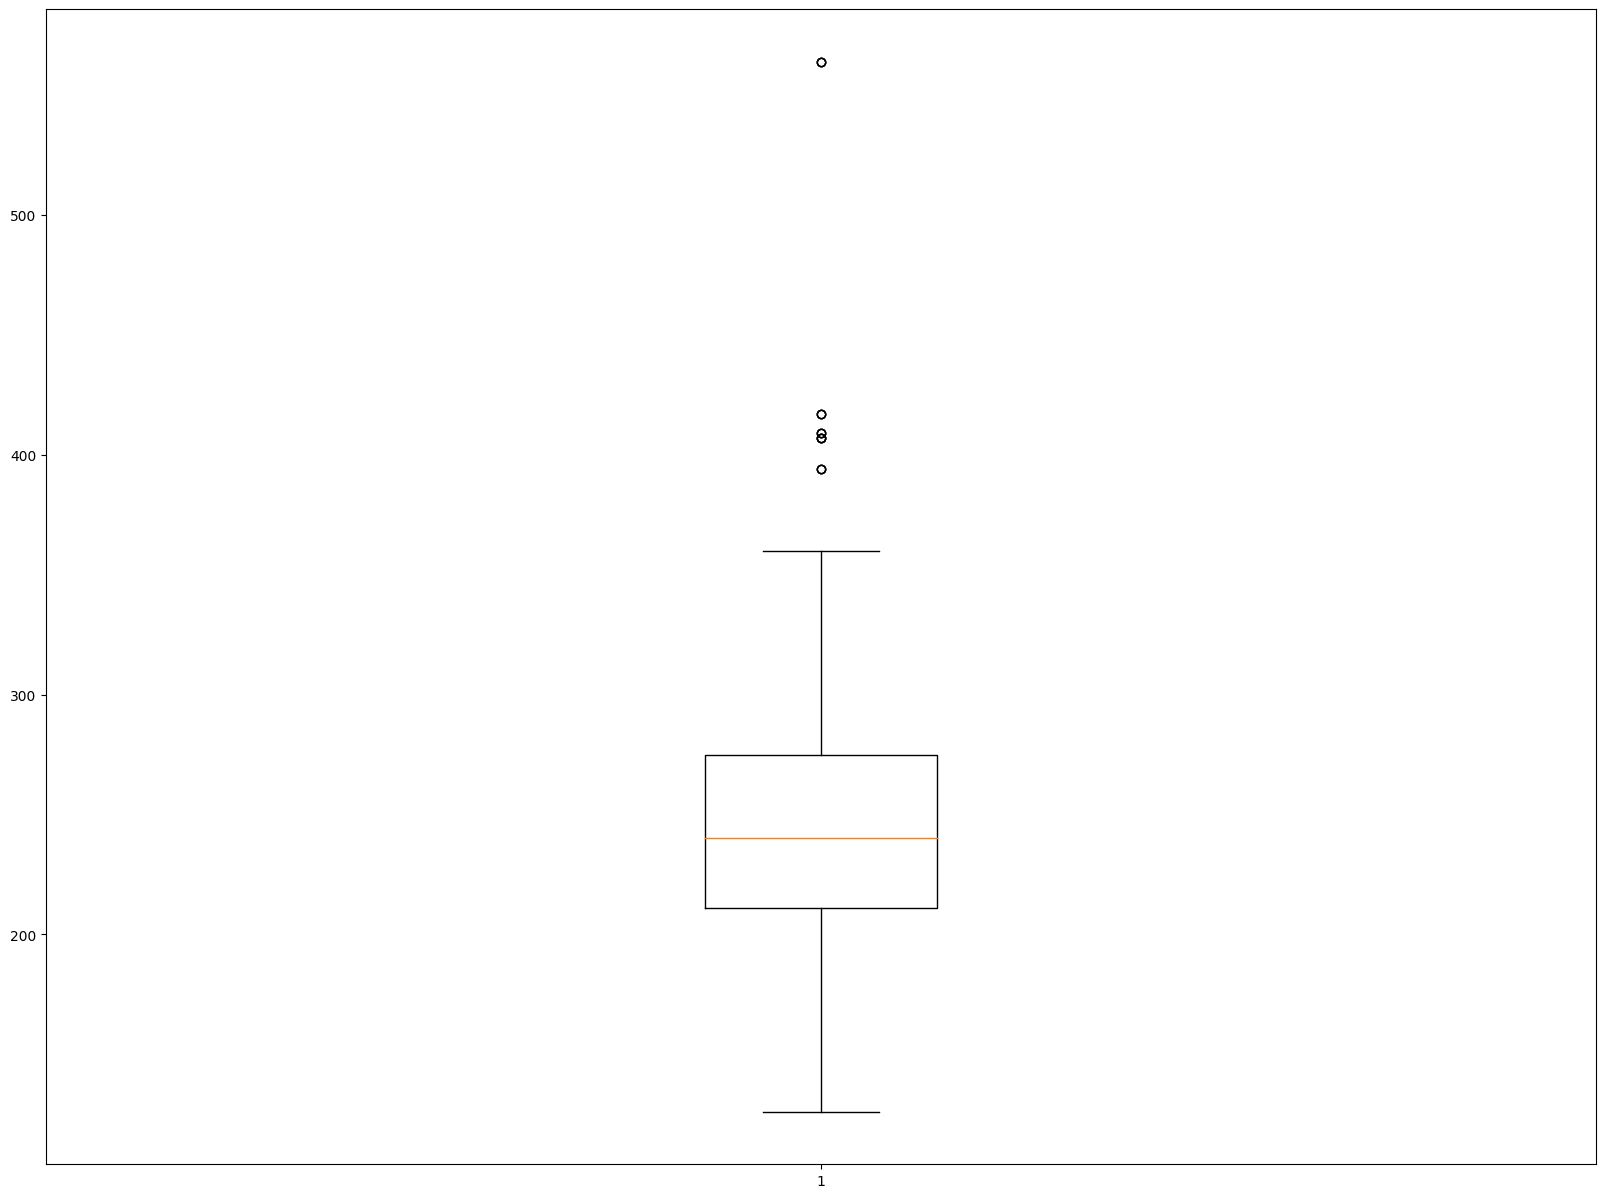

In [ ]:
plt.subplots(figsize=(20,15))
plt.boxplot(data=df, x='chol')

In [ ]:
df['chol'].mean()

246.0

In [ ]:
#Detecting Outliers using Inter Quartile Range
#Finding The data located in First Quartile and Third Quartile
#If the data point significantly differs from other cluster of data points then removing the data point

In [ ]:
outliers_chol = []
def Find_Outliers(data):
    data = sorted(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)

    IQR = Q3-Q1
    l_bound = Q1-(1.5*IQR)
    u_bound = Q3+(1.5*IQR)

    for j in data:
        if (j < l_bound or j > u_bound):
            outliers_chol.append(j)
    return outliers_chol

outliers_chol = Find_Outliers(df['chol'])
print("Outliers from IQR method for chol column: ", outliers_chol)

Outliers from IQR method for chol column:  [394, 394, 394, 407, 407, 407, 407, 409, 409, 409, 417, 417, 417, 564, 564, 564]


In [ ]:
#Replacing the outliers in the chol column with the mean

In [ ]:
for i in outliers_chol:
    df['chol'] = np.where(df['chol'] == i, df['chol'].mean(), df['chol'])

In [ ]:
df

age sex cp  trestbps   chol fbs restecg  thalach exang  oldpeak slope  \
0      52   1  0       125  212.0   0       1      168     0      1.0     2   
1      53   1  0       140  203.0   1       0      155     1      3.1     0   
2      70   1  0       145  174.0   0       1      125     1      2.6     0   
3      61   1  0       148  203.0   0       1      161     0      0.0     2   
4      62   0  0       138  294.0   1       1      106     0      1.9     1   
...   ...  .. ..       ...    ...  ..     ...      ...   ...      ...   ...   
1020   59   1  1       140  221.0   0       1      164     1      0.0     2   
1021   60   1  0       125  258.0   0       0      141     1      2.8     1   
1022   47   1  0       110  275.0   0       0      118     1      1.0     1   
1023   50   0  0       110  254.0   0       0      159     0      0.0     2   
1024   54   1  0       120  188.0   0       1      113     0      1.4     1   

       ca thal target Heart_Disease    sex1   Age_Range  
0     2.0  3.0      0       Absence    Male  Middle Age  
1     0.0  3.0      0       Absence    Male  Middle Age  
2     0.0  3.0      0       Absence    Male   Elder Age  
3     1.0  3.0      0       Absence    Male   Elder Age  
4     3.0  2.0      0       Absence  Female   Elder Age  
...   ...  ...    ...           ...     ...         ...  
1020  0.0  2.0      1      Presence    Male   Elder Age  
1021  1.0  3.0      0       Absence    Male   Elder Age  
1022  1.0  2.0      0       Absence    Male  Middle Age  
1023  0.0  2.0      1      Presence  Female  Middle Age  
1024  1.0  3.0      0       Absence    Male  Middle Age  

[1025 rows x 17 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f638a4d0ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f638a4d11e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f638a48c6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f638a4d1750>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f638a4d19f0>],
 'means': []}

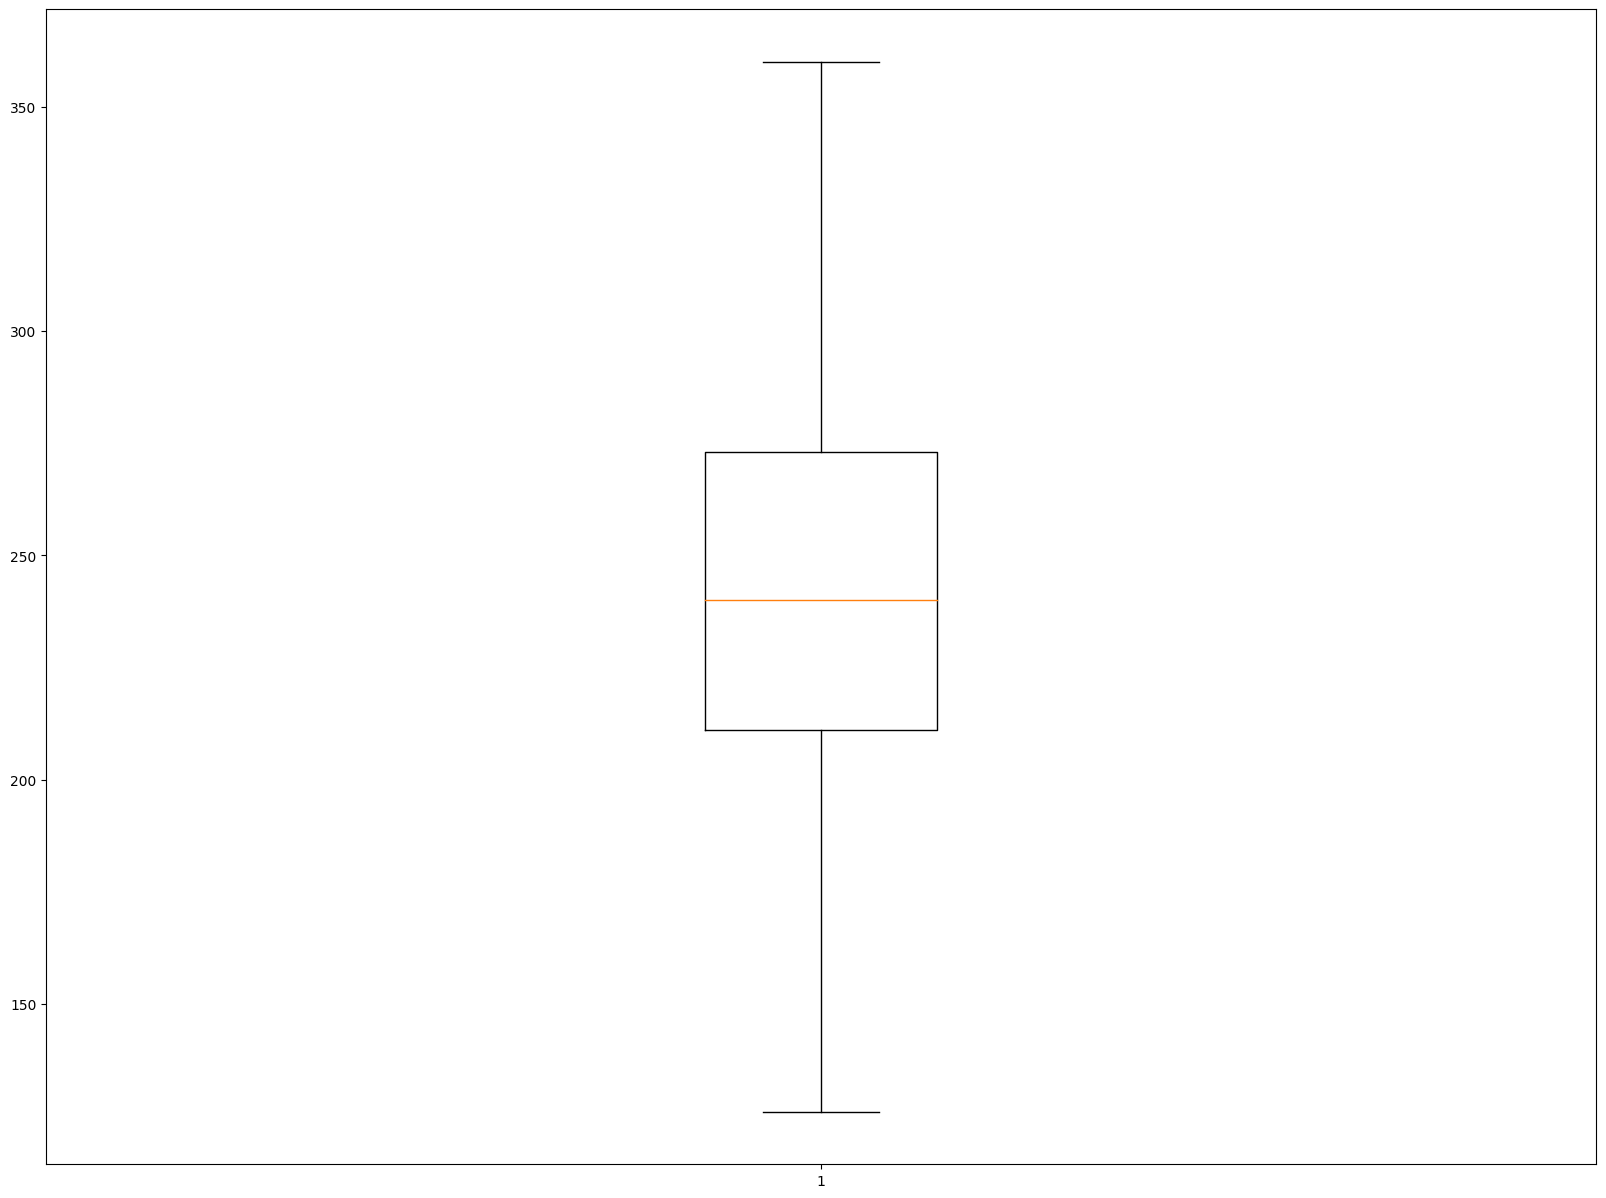

In [ ]:
# Boxplot after removing outlier

plt.subplots(figsize=(20,15))
plt.boxplot(data=df, x='chol')

In [ ]:
# Replacing zeros with mean in 'oldpeak' column

In [ ]:
df['oldpeak']

0       1.0
1       3.1
2       2.6
3       0.0
4       1.9
       ... 
1020    0.0
1021    2.8
1022    1.0
1023    0.0
1024    1.4
Name: oldpeak, Length: 1025, dtype: float64

In [ ]:
df['oldpeak'] = np.where(df['oldpeak'] == 0, df['oldpeak'].mean(), df['oldpeak'])

In [ ]:
# Checking the oldpeak column after replacing zeros with mean

In [ ]:
df['oldpeak']

0       1.000000
1       3.100000
2       2.600000
3       1.071512
4       1.900000
          ...   
1020    1.071512
1021    2.800000
1022    1.000000
1023    1.071512
1024    1.400000
Name: oldpeak, Length: 1025, dtype: float64

In [ ]:
#checking if there are any remaining null values

In [ ]:
df['oldpeak'].isna().count()

# now we can see there are no zero value in oldpeak column

1025

In [ ]:
# If we observe the oldpeak distribution it is skewed
# So we perform Log transformation to remove skewness from 'oldpeak' column

In [ ]:
oldpeak_log = np.log(df['oldpeak'])
oldpeak_log

0       0.000000
1       1.131402
2       0.955511
3       0.069071
4       0.641854
          ...   
1020    0.069071
1021    1.029619
1022    0.000000
1023    0.069071
1024    0.336472
Name: oldpeak, Length: 1025, dtype: float64

# Viewing  the cleaned data set

In [ ]:
df

age sex cp  trestbps   chol fbs restecg  thalach exang   oldpeak slope  \
0      52   1  0       125  212.0   0       1      168     0  1.000000     2   
1      53   1  0       140  203.0   1       0      155     1  3.100000     0   
2      70   1  0       145  174.0   0       1      125     1  2.600000     0   
3      61   1  0       148  203.0   0       1      161     0  1.071512     2   
4      62   0  0       138  294.0   1       1      106     0  1.900000     1   
...   ...  .. ..       ...    ...  ..     ...      ...   ...       ...   ...   
1020   59   1  1       140  221.0   0       1      164     1  1.071512     2   
1021   60   1  0       125  258.0   0       0      141     1  2.800000     1   
1022   47   1  0       110  275.0   0       0      118     1  1.000000     1   
1023   50   0  0       110  254.0   0       0      159     0  1.071512     2   
1024   54   1  0       120  188.0   0       1      113     0  1.400000     1   

       ca thal target Heart_Disease    sex1   Age_Range  
0     2.0  3.0      0       Absence    Male  Middle Age  
1     0.0  3.0      0       Absence    Male  Middle Age  
2     0.0  3.0      0       Absence    Male   Elder Age  
3     1.0  3.0      0       Absence    Male   Elder Age  
4     3.0  2.0      0       Absence  Female   Elder Age  
...   ...  ...    ...           ...     ...         ...  
1020  0.0  2.0      1      Presence    Male   Elder Age  
1021  1.0  3.0      0       Absence    Male   Elder Age  
1022  1.0  2.0      0       Absence    Male  Middle Age  
1023  0.0  2.0      1      Presence  Female  Middle Age  
1024  1.0  3.0      0       Absence    Male  Middle Age  

[1025 rows x 17 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            1025 non-null   int64   
 1   sex            1025 non-null   category
 2   cp             1025 non-null   category
 3   trestbps       1025 non-null   int64   
 4   chol           1025 non-null   float64 
 5   fbs            1025 non-null   category
 6   restecg        1025 non-null   category
 7   thalach        1025 non-null   int64   
 8   exang          1025 non-null   category
 9   oldpeak        1025 non-null   float64 
 10  slope          1025 non-null   category
 11  ca             1025 non-null   category
 12  thal           1025 non-null   category
 13  target         1025 non-null   category
 14  Heart_Disease  1025 non-null   object  
 15  sex1           1025 non-null   object  
 16  Age_Range      1025 non-null   object  
dtypes: category(9), float64(2), int64

In [ ]:
df.describe()

age     trestbps         chol      thalach      oldpeak
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000
mean     54.434146   131.611707   243.014930   149.114146     1.415441
std       9.072290    17.516718    45.029965    23.005724     0.945232
min      29.000000    94.000000   126.000000    71.000000     0.100000
25%      48.000000   120.000000   211.000000   132.000000     1.000000
50%      56.000000   130.000000   240.000000   152.000000     1.071512
75%      61.000000   140.000000   273.000000   166.000000     1.800000
max      77.000000   200.000000   360.000000   202.000000     6.200000

In [ ]:
for x in df.dtypes[df.dtypes=='category'].index:
    print(x+":")
    print(pd.Categorical(df[x]))
    print()

sex:
[1, 1, 1, 1, 0, ..., 1, 1, 1, 0, 1]
Length: 1025
Categories (2, int64): [0, 1]

cp:
[0, 0, 0, 0, 0, ..., 1, 0, 0, 0, 0]
Length: 1025
Categories (4, int64): [0, 1, 2, 3]

fbs:
[0, 1, 0, 0, 1, ..., 0, 0, 0, 0, 0]
Length: 1025
Categories (2, int64): [0, 1]

restecg:
[1, 0, 1, 1, 1, ..., 1, 0, 0, 0, 1]
Length: 1025
Categories (3, int64): [0, 1, 2]

exang:
[0, 1, 1, 0, 0, ..., 1, 1, 1, 0, 0]
Length: 1025
Categories (2, int64): [0, 1]

slope:
[2, 0, 0, 2, 1, ..., 2, 1, 1, 2, 1]
Length: 1025
Categories (3, int64): [0, 1, 2]

ca:
[2.0, 0.0, 0.0, 1.0, 3.0, ..., 0.0, 1.0, 1.0, 0.0, 1.0]
Length: 1025
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 4.0]

thal:
[3.0, 3.0, 3.0, 3.0, 2.0, ..., 2.0, 3.0, 2.0, 2.0, 3.0]
Length: 1025
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

target:
[0, 0, 0, 0, 0, ..., 1, 0, 0, 1, 0]
Length: 1025
Categories (2, int64): [0, 1]



<ipython-input-56-e349d6af218b>:3: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(pd.Categorical(df[x]))


In [ ]:
# Summary for categorical variables
df[df.dtypes[df.dtypes=='category'].index].describe()

sex    cp   fbs  restecg  exang  slope      ca    thal  target
count   1025  1025  1025     1025   1025   1025  1025.0  1025.0    1025
unique     2     4     2        3      2      3     5.0     4.0       2
top        1     0     0        1      0      1     0.0     2.0       1
freq     713   497   872      513    680    482   578.0   544.0     526

In [ ]:
df.dtypes

age                 int64
sex              category
cp               category
trestbps            int64
chol              float64
fbs              category
restecg          category
thalach             int64
exang            category
oldpeak           float64
slope            category
ca               category
thal             category
target           category
Heart_Disease      object
sex1               object
Age_Range          object
dtype: object

# EDA after cleaning the data

In [ ]:
prof=ProfileReport(df,title="Heart_Dataset_Profile_Report_Before_Cleanup.html", html={'style':{'fullwidth':True}})

In [ ]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Exporting the Preprocessed dataset into a csv file for further analysis

In [ ]:
# Now we will export the preprocessed dataset to a csv file with no row indexes
# Output file: preprocessed_heart_disease_dataset.csv

df.to_csv('preprocessed_heart_disease_dataset.csv',index = False)

In [ ]:
df

age sex cp  trestbps   chol fbs restecg  thalach exang   oldpeak slope  \
0      52   1  0       125  212.0   0       1      168     0  1.000000     2   
1      53   1  0       140  203.0   1       0      155     1  3.100000     0   
2      70   1  0       145  174.0   0       1      125     1  2.600000     0   
3      61   1  0       148  203.0   0       1      161     0  1.071512     2   
4      62   0  0       138  294.0   1       1      106     0  1.900000     1   
...   ...  .. ..       ...    ...  ..     ...      ...   ...       ...   ...   
1020   59   1  1       140  221.0   0       1      164     1  1.071512     2   
1021   60   1  0       125  258.0   0       0      141     1  2.800000     1   
1022   47   1  0       110  275.0   0       0      118     1  1.000000     1   
1023   50   0  0       110  254.0   0       0      159     0  1.071512     2   
1024   54   1  0       120  188.0   0       1      113     0  1.400000     1   

       ca thal target Heart_Disease    sex1   Age_Range  
0     2.0  3.0      0       Absence    Male  Middle Age  
1     0.0  3.0      0       Absence    Male  Middle Age  
2     0.0  3.0      0       Absence    Male   Elder Age  
3     1.0  3.0      0       Absence    Male   Elder Age  
4     3.0  2.0      0       Absence  Female   Elder Age  
...   ...  ...    ...           ...     ...         ...  
1020  0.0  2.0      1      Presence    Male   Elder Age  
1021  1.0  3.0      0       Absence    Male   Elder Age  
1022  1.0  2.0      0       Absence    Male  Middle Age  
1023  0.0  2.0      1      Presence  Female  Middle Age  
1024  1.0  3.0      0       Absence    Male  Middle Age  

[1025 rows x 17 columns]